Exploratory Data Analysis on Retail Sales Dataset

Project Overview

This project performs Exploratory Data Analysis (EDA) on a retail sales dataset to uncover customer behavior, product performance, and revenue trends. The analysis aims to generate actionable insights that help businesses in decision-making, customer retention, and sales optimization.

Import Libraries

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# plotting settings
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# create folder for outputs
os.makedirs('figures', exist_ok=True)


Load data & initial checks

In [36]:
# file path 
file_path = 'C:/Users/OSAMA ANSARI/Downloads/OasisInfotech Internship Projects/retail_sales_dataset.csv'
df = pd.read_csv(file_path)



In [37]:
# checks
print("rows, cols:", df.shape)


rows, cols: (1000, 9)


In [38]:
display(df.head())


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [39]:
display(df.tail())

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [40]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


None

In [42]:
# check missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [43]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Date,1000,345,2023-05-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,1000,1000,CUST1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,13.68143,18.0,29.0,42.0,53.0,64.0
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.132734,1.0,1.0,3.0,4.0,4.0
Price per Unit,1000.0,NaN,NaN,NaN,179.89,189.681356,25.0,30.0,50.0,300.0,500.0
Total Amount,1000.0,NaN,NaN,NaN,456.0,559.997632,25.0,60.0,135.0,900.0,2000.0


Convert types, tidy date column

In [44]:
# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # errors->NaT for bad values
print("Date min/max:", df['Date'].min(), df['Date'].max())




Date min/max: 2023-01-01 00:00:00 2024-01-01 00:00:00


In [45]:

# numeric cast 
num_cols = ['Quantity','Price per Unit','Total Amount','Age']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')



In [46]:
# check converted types
display(df.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

Data quality checks & cleaning

In [47]:
# duplicates
dups = df.duplicated().sum()
print("Duplicate rows:", dups)



Duplicate rows: 0


In [48]:


# mismatch between computed and recorded total
mismatch = df[df['Total Amount'] != df['Quantity'] * df['Price per Unit']]
print("Mismatched rows (Total != Quantity * Price per Unit):", len(mismatch))
display(mismatch.head())

Mismatched rows (Total != Quantity * Price per Unit): 0


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [49]:
# check unrealistic values
print("Negative / zero quantities:", (df['Quantity'] <= 0).sum())
print("Negative / zero prices:", (df['Price per Unit'] <= 0).sum())
print("Ages outside 10-100:", df[(df['Age'] < 10) | (df['Age'] > 100)].shape[0])



Negative / zero quantities: 0
Negative / zero prices: 0
Ages outside 10-100: 0


In [50]:


df = df.dropna(subset=['Date'])  # keep only transactions with valid date

Feature engineering

In [61]:
# time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter



In [60]:

# revenue per unit (safe)
df['Revenue_per_unit'] = df['Total Amount'] / df['Quantity']



In [59]:


# age groups
bins = [0, 18, 25, 35, 45, 60, 120]
labels = ['<18','18-24','25-34','35-44','45-59','60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)



In [54]:
# order-level: if one transaction id equals order id
orders = df.groupby('Transaction ID').agg({
    'Date':'first',
    'Customer ID':'first',
    'Quantity':'sum',
    'Total Amount':'sum'
}).reset_index().rename(columns={'Quantity':'Items_in_Order','Total Amount':'Order_Total'})

display(orders.head())

,Transaction ID,Date,Customer ID,Items_in_Order,Order_Total
0,1,2023-11-24,CUST001,3,150
1,2,2023-02-27,CUST002,2,1000
2,3,2023-01-13,CUST003,1,30
3,4,2023-05-21,CUST004,1,500
4,5,2023-05-06,CUST005,2,100


Descriptive statistics

In [13]:
# overall numeric summary
display(df[['Quantity','Price per Unit','Total Amount']].describe())

,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.000000
mean,2.514000,179.890000,456.000000
std,1.132734,189.681356,559.997632
min,1.000000,25.000000,25.000000
25%,1.000000,30.000000,60.000000
50%,3.000000,50.000000,135.000000
75%,4.000000,300.000000,900.000000
max,4.000000,500.000000,2000.000000


In [14]:
# revenue, count by Product Category
cat_summary = df.groupby('Product Category').agg(
    revenue=('Total Amount','sum'),
    transactions=('Transaction ID','nunique'),
    avg_order_value=('Total Amount','mean')
).sort_values('revenue', ascending=False).reset_index()
display(cat_summary)

,Product Category,revenue,transactions,avg_order_value
0,Electronics,156905,342,458.786550
1,Clothing,155580,351,443.247863
2,Beauty,143515,307,467.475570


In [15]:
# gender & age summary
display(df.groupby('Gender').agg(
    revenue=('Total Amount','sum'),
    avg_age=('Age','mean'),
    count=('Customer ID','nunique')
).reset_index())

,Gender,revenue,avg_age,count
0,Female,232840,41.356863,510
1,Male,223160,41.428571,490


Customer-level aggregates

In [16]:
# snapshot_date = last date + 1 day (for recency)
snapshot_date = df['Date'].max() + pd.Timedelta(days=1)

In [17]:
# customer aggregates
cust = df.groupby('Customer ID').agg({
    'Date':'max',
    'Transaction ID':'nunique',
    'Total Amount':'sum'
}).rename(columns={'Date':'LastPurchaseDate','Transaction ID':'Frequency','Total Amount':'Monetary'})

cust['Recency'] = (snapshot_date - cust['LastPurchaseDate']).dt.days
cust = cust.drop(columns='LastPurchaseDate')
display(cust.sort_values('Monetary', ascending=False).head(10))

,Frequency,Monetary,Recency
Customer ID,,,
CUST015,1,2000,351
CUST412,1,2000,108
CUST970,1,2000,231
CUST547,1,2000,301
CUST281,1,2000,224
CUST416,1,2000,319
CUST420,1,2000,344
CUST927,1,2000,192
CUST447,1,2000,180


Time series: sales trend & seasonality

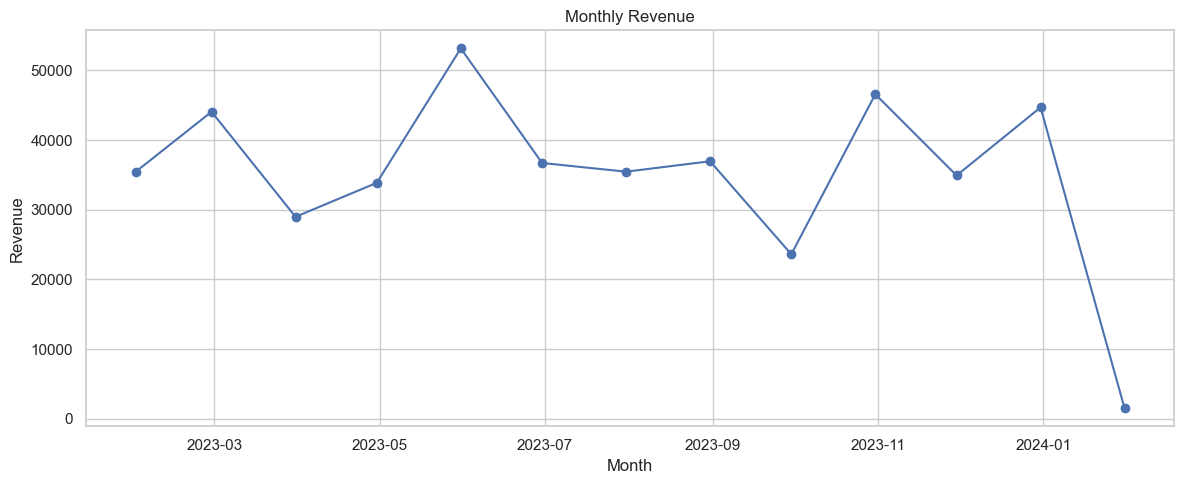

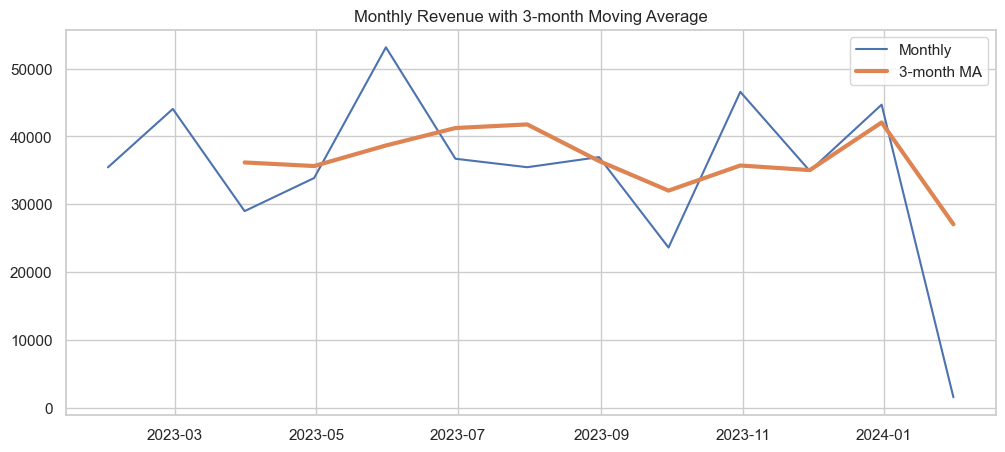

In [26]:
# daily revenue
daily = df.set_index('Date').resample('D')['Total Amount'].sum().fillna(0)

# monthly revenue
monthly = df.set_index('Date').resample('ME')['Total Amount'].sum()

# plots
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title('Monthly Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/monthly_revenue.png')
plt.show()

# moving average
monthly_ma = monthly.rolling(window=3).mean()
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, label='Monthly')
plt.plot(monthly_ma.index, monthly_ma.values, label='3-month MA', linewidth=3)
plt.legend()
plt.title('Monthly Revenue with 3-month Moving Average')
plt.show()


Product & basket analysis


In [28]:
# top products/categories by revenue & volume
top_products = df.groupby('Product Category').agg(revenue=('Total Amount','sum'), qty=('Quantity','sum')).sort_values('revenue', ascending=False)
display(top_products)

,revenue,qty
Product Category,,
Electronics,156905,849
Clothing,155580,894
Beauty,143515,771


In [29]:
# pivot heatmap: month vs product category revenue
pivot = df.pivot_table(index='MonthName', columns='Product Category', values='Total Amount', aggfunc='sum').fillna(0)


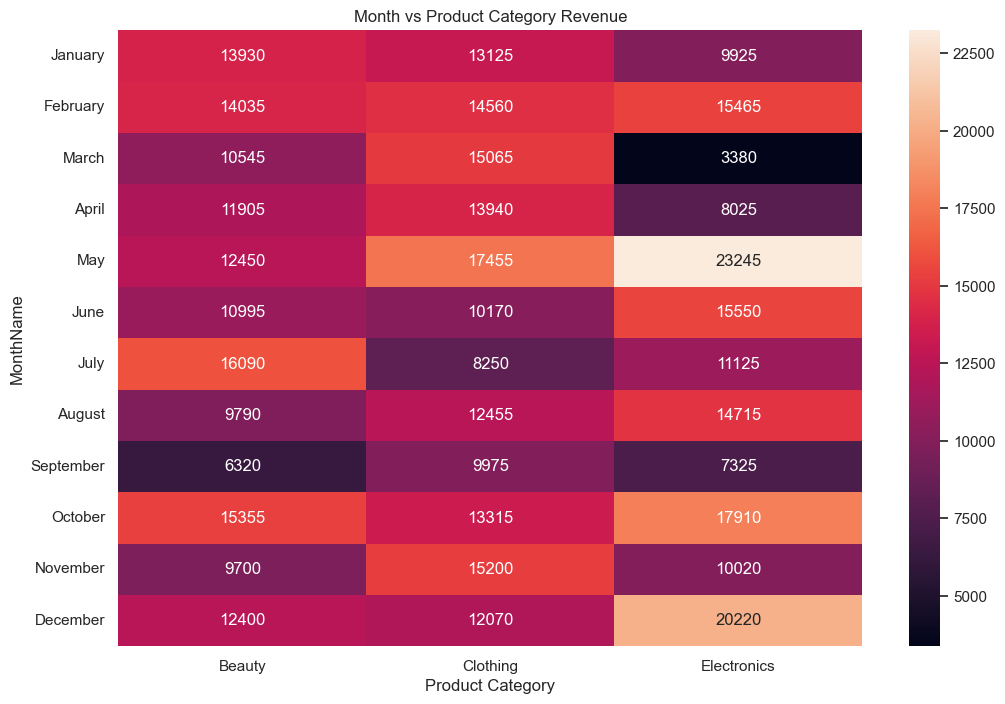

In [67]:
# reorder months
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
pivot = pivot.reindex(month_order).fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title('Month vs Product Category Revenue')
plt.show()



Visualizations

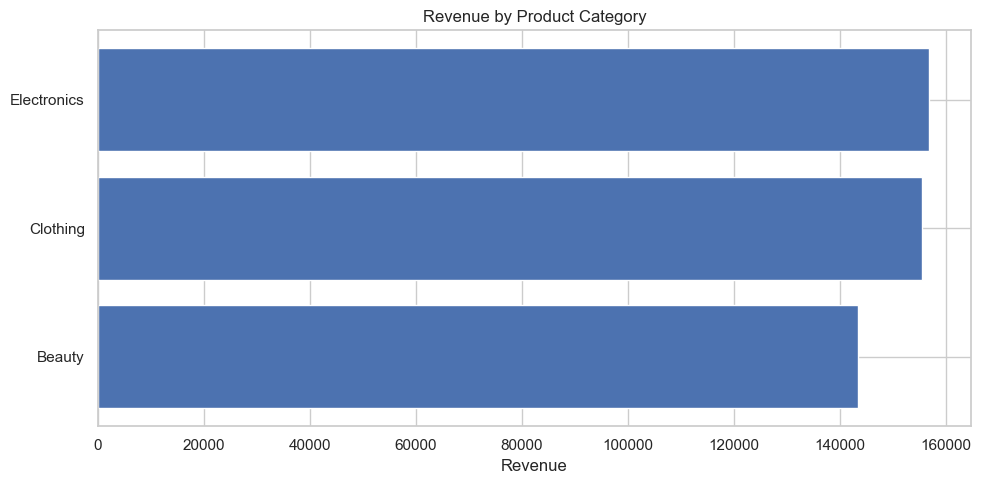

In [32]:
plt.figure(figsize=(10,5))
cat_summary = cat_summary.sort_values('revenue', ascending=True)
plt.barh(cat_summary['Product Category'], cat_summary['revenue'])
plt.title('Revenue by Product Category')
plt.xlabel('Revenue')
plt.tight_layout()
plt.savefig('figures/revenue_by_category.png')
plt.show()


Outliers & anomaly detection

In [33]:
# IQR method for Order_Total 
Q1 = orders['Order_Total'].quantile(0.25)
Q3 = orders['Order_Total'].quantile(0.75)
IQR = Q3 - Q1
outliers = orders[(orders['Order_Total'] < Q1 - 1.5*IQR) | (orders['Order_Total'] > Q3 + 1.5*IQR)]
print("Outlier orders:", outliers.shape[0])
display(outliers.head())


Outlier orders: 0


,Transaction ID,Date,Customer ID,Items_in_Order,Order_Total


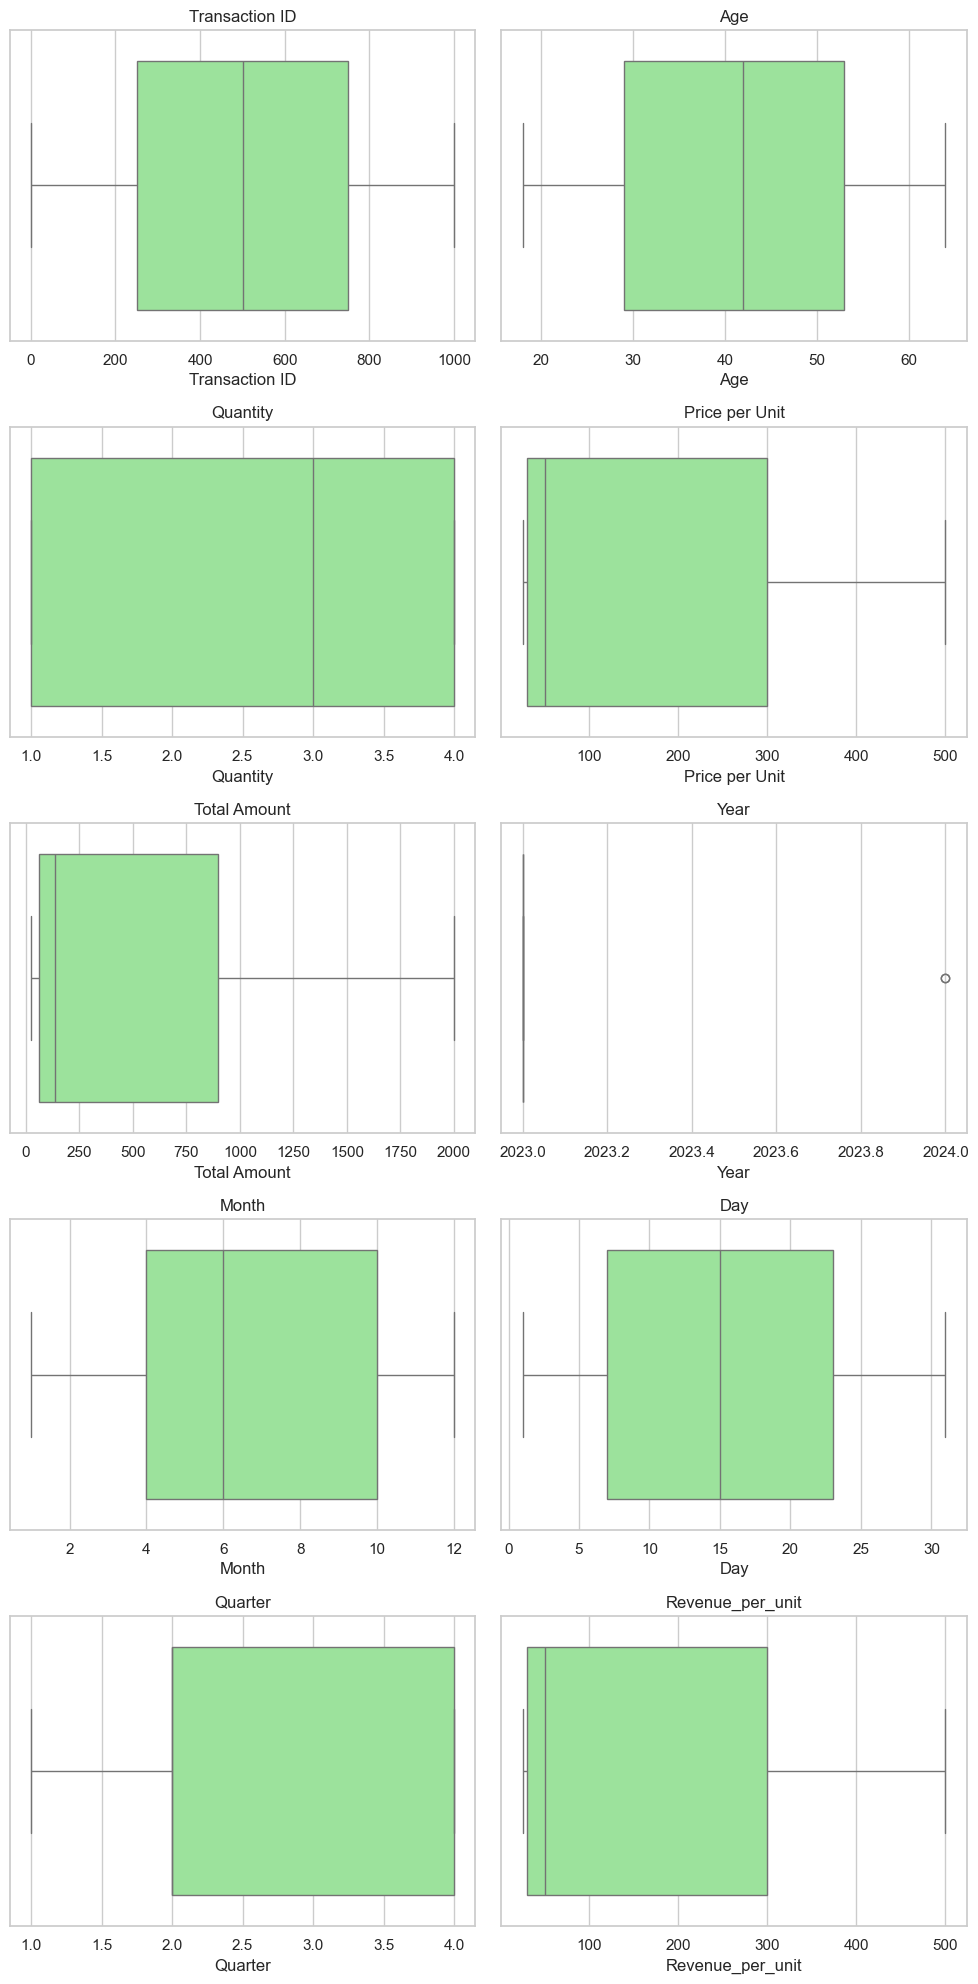

In [64]:
# Get all numerical columns
num_cols = df.select_dtypes(include="number").columns.tolist()

# Plot settings
cols = 2 # number of plots per row
rows = (len(num_cols) + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(col)
    plt.gca().set_facecolor('white')  # light background

plt.tight_layout()
plt.show()

Recommendations

1. Inventory & stocking: increase stock for top 20% SKUs that generate ~80% revenue; reorder monthly before peak months.

2. Marketing: run targeted campaigns for high lifetime value customers (top RFM segments); use demographic segments (25–34 age, female/male) per product preferences.

3. Cross-sell: use association rules to bundle commonly bought categories (e.g., Beauty + Clothing).

4. Pricing/discounting: investigate categories with high price dispersion (large boxplot IQR) — possible inconsistent pricing.

5. Promotions timing: amplify promotions in months/weekday peaks from time-series analysis.

6. Data ops: fix mismatches where Total Amount != Quantity * Price per Unit or add explicit discount column in future.

Thank You!